<a href="https://colab.research.google.com/github/msatyajit7045/Bengaluru-Weather-Report/blob/main/Bengaluru_Weather_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [222]:
# Importing libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [223]:
#Reading the csv file
path= "/content/Bangalore Weather Report.csv"
df = pd.read_csv(path)

# **Data Cleaning**


In [224]:
# lets see some top rows
df.head()

,time,weathercode (wmo code),temperature_2m_mean (°C),apparent_temperature_mean (°C),shortwave_radiation_sum (MJ/m²),precipitation_sum (mm),rain_sum (mm),precipitation_hours (h),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°),et0_fao_evapotranspiration (mm)
0,2/18/2020,1.0,22.0,22.0,25.14,0.0,0.0,0,14.8,34.9,94.0,5.97
1,2/19/2020,1.0,22.5,23.0,24.39,0.0,0.0,0,15.5,29.2,97.0,5.63
2,2/20/2020,0.0,22.0,22.1,25.55,0.0,0.0,0,15.4,31.3,98.0,5.97
3,2/21/2020,2.0,22.3,22.8,25.47,0.0,0.0,0,15.6,28.8,105.0,5.84
4,2/22/2020,3.0,22.6,23.8,24.66,0.0,0.0,0,15.7,29.5,97.0,5.56


In [225]:
# let see some bottom rows
df.tail(10)

,time,weathercode (wmo code),temperature_2m_mean (°C),apparent_temperature_mean (°C),shortwave_radiation_sum (MJ/m²),precipitation_sum (mm),rain_sum (mm),precipitation_hours (h),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°),et0_fao_evapotranspiration (mm)
1087,2/9/2023,1.0,22.5,22.8,23.79,0.0,0.0,0,14.2,33.5,85.0,5.45
1088,2/10/2023,1.0,22.3,21.8,24.17,0.0,0.0,0,15.3,35.3,80.0,5.67
1089,2/11/2023,1.0,22.2,21.2,24.56,0.0,0.0,0,12.8,30.6,79.0,5.67
1090,2/12/2023,1.0,22.6,21.9,24.60,0.0,0.0,0,15.7,35.3,84.0,6.07
1091,2/13/2023,0.0,NaN,NaN,NaN,NaN,NaN,0,9.8,16.6,NaN,NaN
1092,2/14/2023,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
1093,2/15/2023,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
1094,2/16/2023,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
1095,2/17/2023,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
1096,2/18/2023,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN


In [226]:
# print technical information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097 entries, 0 to 1096
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   time                             1097 non-null   object 
 1   weathercode (wmo code)           1092 non-null   float64
 2   temperature_2m_mean (°C)         1091 non-null   float64
 3   apparent_temperature_mean (°C)   1091 non-null   float64
 4   shortwave_radiation_sum (MJ/m²)  1091 non-null   float64
 5   precipitation_sum (mm)           1091 non-null   float64
 6   rain_sum (mm)                    1091 non-null   float64
 7   precipitation_hours (h)          1097 non-null   int64  
 8   windspeed_10m_max (km/h)         1092 non-null   float64
 9   windgusts_10m_max (km/h)         1092 non-null   float64
 10  winddirection_10m_dominant (°)   1091 non-null   float64
 11  et0_fao_evapotranspiration (mm)  1091 non-null   float64
dtypes: float64(10), int6

In [227]:
#Changing The datatype of time column
df['time']=df['time'].astype('datetime64[D]')


In [228]:
#Extracting Month from time column
df['Month']=df['time'].dt.month


In [229]:
df = df.drop(columns = ['time'])

In [230]:
# shape of tha dataframe
df.shape

(1097, 12)

In [231]:
# check for Null values in our data frame.
df.isnull().sum()

weathercode (wmo code)             5
temperature_2m_mean (°C)           6
apparent_temperature_mean (°C)     6
shortwave_radiation_sum (MJ/m²)    6
precipitation_sum (mm)             6
rain_sum (mm)                      6
precipitation_hours (h)            0
windspeed_10m_max (km/h)           5
windgusts_10m_max (km/h)           5
winddirection_10m_dominant (°)     6
et0_fao_evapotranspiration (mm)    6
Month                              0
dtype: int64

In [232]:
#dropping raw with missing value
df=df.dropna()

In [233]:
df.isnull().sum()


weathercode (wmo code)             0
temperature_2m_mean (°C)           0
apparent_temperature_mean (°C)     0
shortwave_radiation_sum (MJ/m²)    0
precipitation_sum (mm)             0
rain_sum (mm)                      0
precipitation_hours (h)            0
windspeed_10m_max (km/h)           0
windgusts_10m_max (km/h)           0
winddirection_10m_dominant (°)     0
et0_fao_evapotranspiration (mm)    0
Month                              0
dtype: int64

In [234]:
df.shape

(1091, 12)

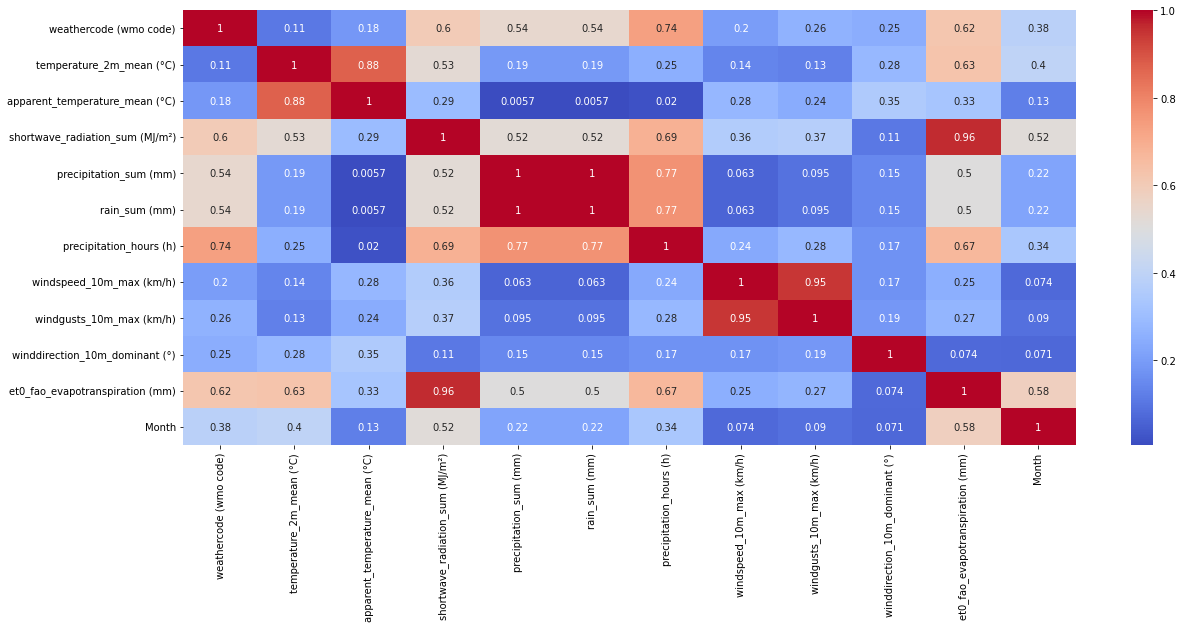

In [235]:
# Checking multicollinearity using heatmap
plt.figure(figsize=(20,8))
corr=df.corr()
sns.heatmap(data=abs(corr),annot=True,cmap='coolwarm')

We can see in the heatmap precipitation_sum (mm) is highly corelate with rain_sum, apparent_temp is also corelate with mean_temp, windgusts is related with windspeed. so we have to remove one of the feature from above pair.


In [236]:
# dropping highly

df.drop('precipitation_sum (mm)',inplace=True,axis=1)
df.drop('apparent_temperature_mean (°C)',inplace=True,axis=1)
df.drop('windgusts_10m_max (km/h)',inplace=True,axis=1)



In [237]:
#shortwave_radiation is also corelate with evaportranspiration
df.drop('shortwave_radiation_sum (MJ/m²)',inplace=True,axis=1)

In [238]:
df.head()

,weathercode (wmo code),temperature_2m_mean (°C),rain_sum (mm),precipitation_hours (h),windspeed_10m_max (km/h),winddirection_10m_dominant (°),et0_fao_evapotranspiration (mm),Month
0,1.0,22.0,0.0,0,14.8,94.0,5.97,2
1,1.0,22.5,0.0,0,15.5,97.0,5.63,2
2,0.0,22.0,0.0,0,15.4,98.0,5.97,2
3,2.0,22.3,0.0,0,15.6,105.0,5.84,2
4,3.0,22.6,0.0,0,15.7,97.0,5.56,2


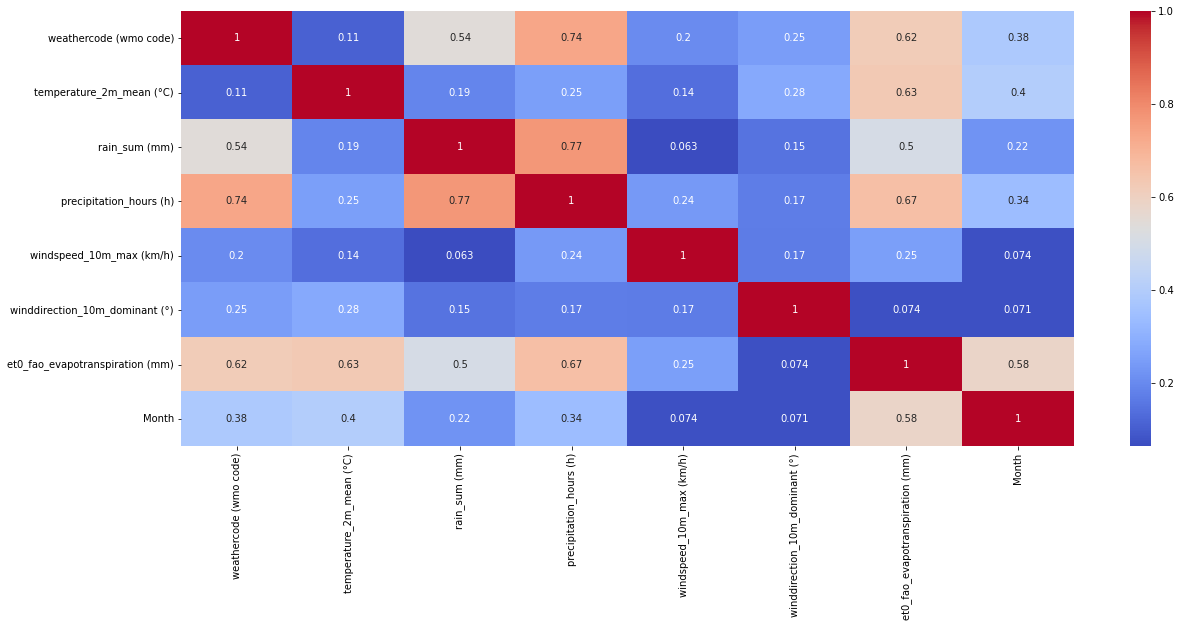

In [239]:
plt.figure(figsize=(20,8))
corr=df.corr()
sns.heatmap(data=abs(corr),annot=True,cmap='coolwarm')

In [240]:
df.head()

,weathercode (wmo code),temperature_2m_mean (°C),rain_sum (mm),precipitation_hours (h),windspeed_10m_max (km/h),winddirection_10m_dominant (°),et0_fao_evapotranspiration (mm),Month
0,1.0,22.0,0.0,0,14.8,94.0,5.97,2
1,1.0,22.5,0.0,0,15.5,97.0,5.63,2
2,0.0,22.0,0.0,0,15.4,98.0,5.97,2
3,2.0,22.3,0.0,0,15.6,105.0,5.84,2
4,3.0,22.6,0.0,0,15.7,97.0,5.56,2


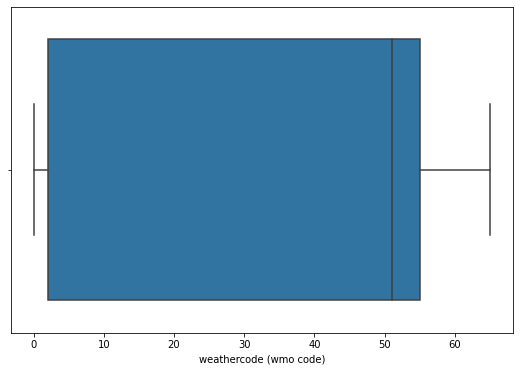

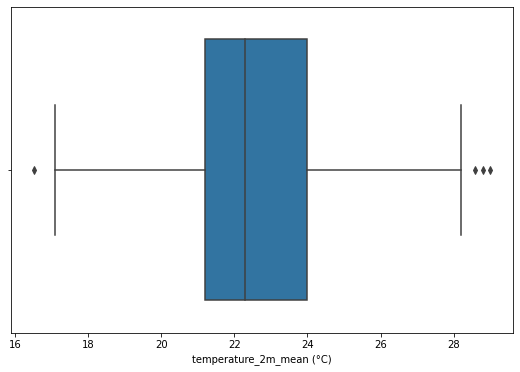

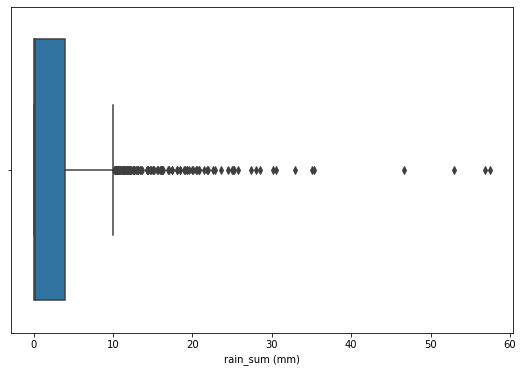

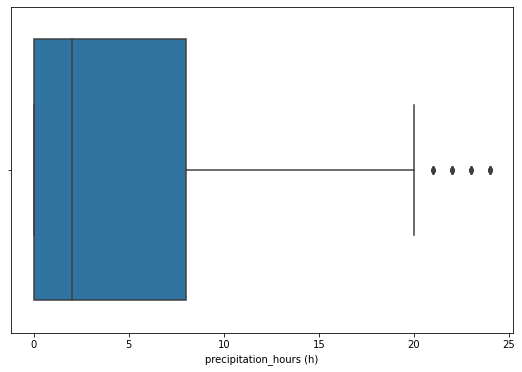

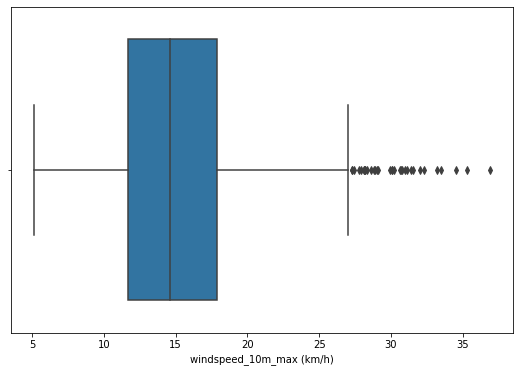

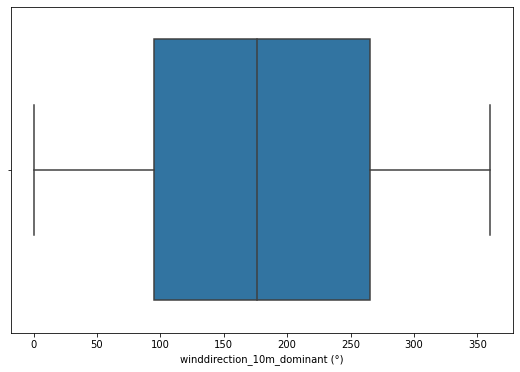

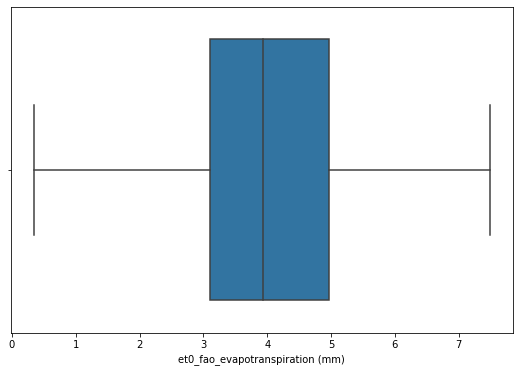

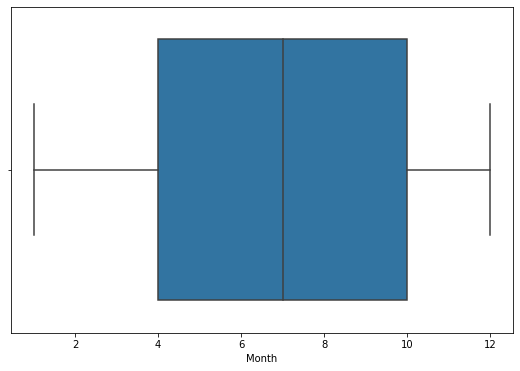

In [241]:
# create numeric columns list.
features_list=df.describe().columns.tolist()
features_list

# priting box plot of features to check oultliers
for col in features_list:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    sns.boxplot(x=df[col])

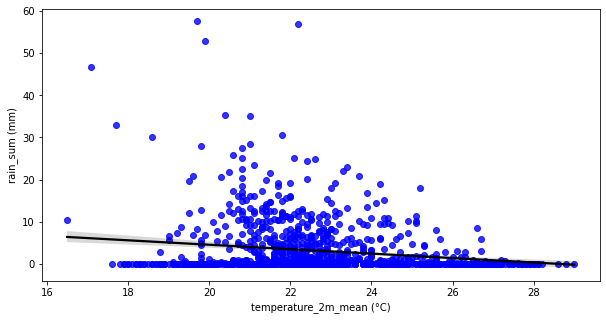

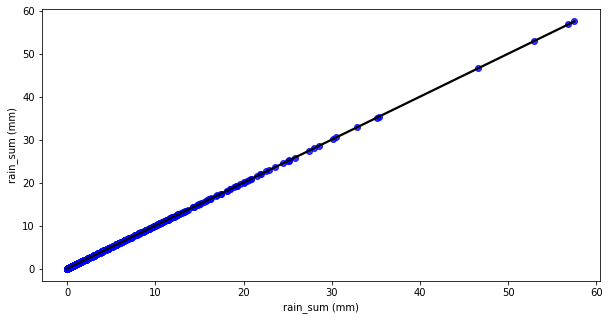

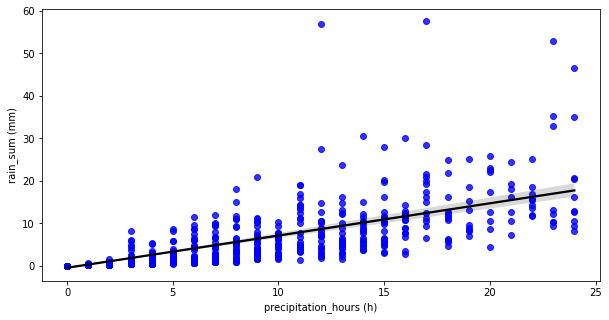

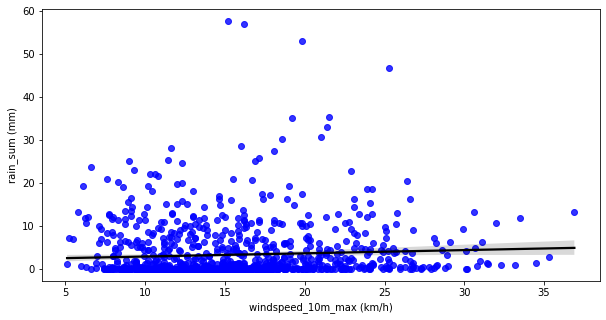

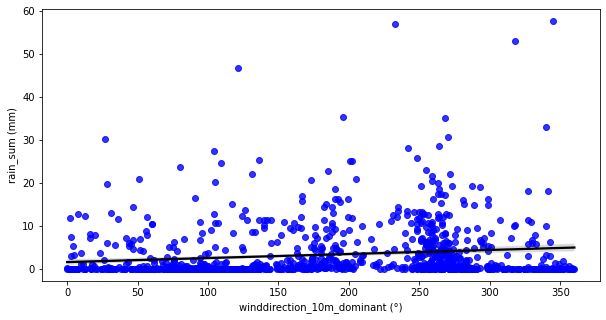

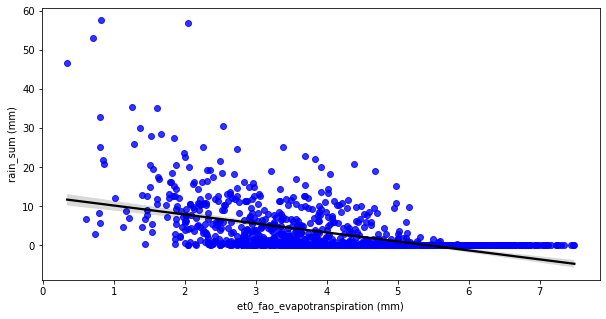

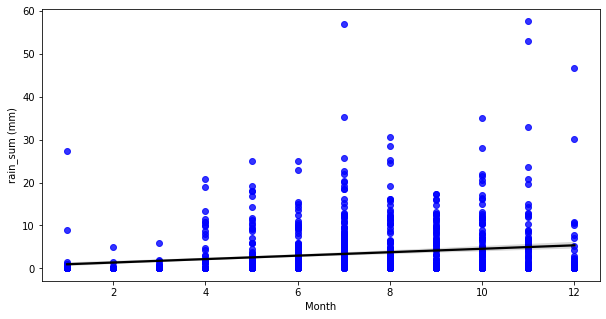

In [ ]:
for col in features_list:
  plt.figure(figsize=(10,5))
  ax=fig.gca()
  sns.regplot(x=df[col],y=df['rain_sum (mm)'],scatter_kws={'color':'blue'},line_kws={'color':'black'})

##Linear Regression

In [242]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

In [243]:
X=df.drop('rain_sum (mm)',axis=1)
y=np.sqrt(df['rain_sum (mm)'])

In [244]:
# Spliting data into train test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

In [245]:
X_train

,weathercode (wmo code),temperature_2m_mean (°C),precipitation_hours (h),windspeed_10m_max (km/h),winddirection_10m_dominant (°),et0_fao_evapotranspiration (mm),Month
923,63.0,22.0,12,11.8,118.0,2.76,8
944,51.0,21.8,5,16.2,173.0,3.42,9
1040,1.0,18.6,0,11.8,41.0,4.26,12
120,3.0,23.4,0,27.3,248.0,3.19,6
565,63.0,21.3,17,19.8,263.0,2.39,9
...,...,...,...,...,...,...,...
898,63.0,21.9,22,12.3,167.0,2.11,8
919,63.0,21.8,16,17.1,142.0,2.85,8
500,55.0,23.8,9,15.7,268.0,3.93,7
941,51.0,22.4,2,17.0,182.0,3.55,9


In [246]:
# Transforming data 
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [247]:
# Taking instance
l_reg=LinearRegression()


In [248]:
l_reg.fit(X_train,y_train)

LinearRegression()

In [249]:
# Cheecking coefficents
l_reg.coef_

array([ 0.8592854 , -0.06281448,  4.01043814, -0.83843829,  0.08337283,
        0.02097763, -0.16304374])

In [250]:
# get dataframe for x columns and coefficient
pd.DataFrame(l_reg.coef_,X.columns, columns=['Coefficient'])

,Coefficient
weathercode (wmo code),0.859285
temperature_2m_mean (°C),-0.062814
precipitation_hours (h),4.010438
windspeed_10m_max (km/h),-0.838438
winddirection_10m_dominant (°),0.083373
et0_fao_evapotranspiration (mm),0.020978
Month,-0.163044


In [251]:
# Y peredictions on train data
y_pred_train=l_reg.predict(X_train)

In [252]:

# y predictions on test data
y_pred=l_reg.predict(X_test)

In [253]:
#Calculating Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculating  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculating Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculating R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

 The Mean Absolute Error (MAE) is 0.32962514650151437.
 The Mean Squred Error(MSE) is 0.31613559145006365.
The Root Mean Squared Error(RMSE) is 0.5622593631501956.
The R2 Score is 0.8521543335012113.


##Gradient Boosting Regressor

In [254]:

from sklearn.ensemble import GradientBoostingRegressor

gradboo_reg=GradientBoostingRegressor()
gradboo_reg.fit(X_train,y_train)

GradientBoostingRegressor()

In [255]:
gradboo_reg.score(X_train,y_train)

0.9868612271021017

In [256]:
gradboo_reg.score(X_test,y_test)

0.949375639926151

In [257]:
y_pred_train=gradboo_reg.predict(X_train)
y_pred=gradboo_reg.predict(X_test)

In [258]:

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
gbr_R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {gbr_R2}.")

 The Mean Absolute Error (MAE) is 0.16302151434918832.
 The Mean Squred Error(MSE) is 0.10824911133839919.
The Root Mean Squared Error(RMSE) is 0.32901232703106914.
The R2 Score is 0.949375639926151.


Using GridSearchCV on Gradient Boosting

In [259]:
gbr=GradientBoostingRegressor()

In [260]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [50,80,100,150],
                  'max_depth'    : [4,6,8,10]
                 }

In [261]:
#Gridsearch
grad_boo_tuning=GridSearchCV(gbr,param_grid=parameters,cv=4,n_jobs=1)
# fitting gridsearc on xtrain and ytrain
grad_boo_tuning.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=GradientBoostingRegressor(), n_jobs=1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [50, 80, 100, 150],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [262]:
# get best paramters to use
grad_boo_tuning.best_params_

{'learning_rate': 0.03, 'max_depth': 10, 'n_estimators': 150, 'subsample': 0.2}

In [263]:
  # USing best paramters tunned by GridsearchCv 
  gradboo_tuned=GradientBoostingRegressor(learning_rate=0.04,max_depth=8,n_estimators=150,subsample=0.9)
  gradboo_tuned.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.04, max_depth=8, n_estimators=150,
                          subsample=0.9)

In [264]:
  # checking score on train data
  gradboo_tuned.score(X_train,y_train)

0.9999490010202849

In [265]:
#checking score on test data
gradboo_tuned.score(X_test,y_test)

0.946059421147965

#Conclussion

I choose R2 is the performance matric according to that Gradient Boosting model is giving best R2 in this Dataset.